In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
from scipy.special import softmax


x = np.linspace(-10, 10, 1000)

def sigmoid(x):
    return expit(x)

def dsigmoid(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh(x):
    return np.tanh(x)

def dtanh(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(0, x)

def drelu(x):
    return (x > 0).astype(float)

def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)))

def dgelu(x):
    c = np.sqrt(2 / np.pi)
    tanh_term = np.tanh(c * (x + 0.044715 * x**3))
    sech2 = 1 - tanh_term**2
    term1 = 0.5 * (1 + tanh_term)
    term2 = 0.5 * x * sech2 * c * (1 + 3 * 0.044715 * x**2)
    return term1 + term2

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def delu(x, alpha=1.0):
    return np.where(x > 0, 1, alpha * np.exp(x))

def swish(x):
    return x * sigmoid(x)

def dswish(x):
    s = sigmoid(x)
    return s + x * s * (1 - s)

def softmax_func(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

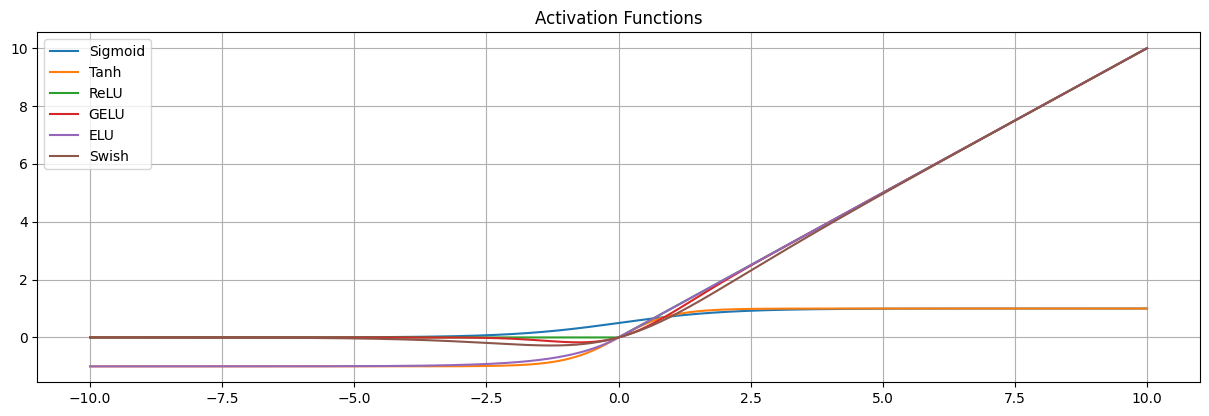

In [ ]:
plt.figure(figsize=(15, 10))


plt.subplot(2, 1, 1)
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, tanh(x), label='Tanh')
plt.plot(x, relu(x), label='ReLU')
plt.plot(x, gelu(x), label='GELU')
plt.plot(x, elu(x), label='ELU')
plt.plot(x, swish(x), label='Swish')
plt.title('Activation Functions')
plt.legend()
plt.grid(True)


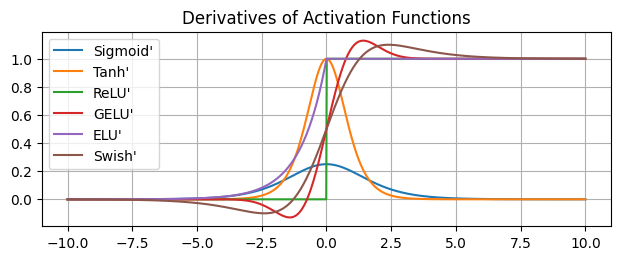

In [ ]:


plt.subplot(2, 1, 2)
plt.plot(x, dsigmoid(x), label='Sigmoid\'')
plt.plot(x, dtanh(x), label='Tanh\'')
plt.plot(x, drelu(x), label='ReLU\'')
plt.plot(x, dgelu(x), label='GELU\'')
plt.plot(x, delu(x), label='ELU\'')
plt.plot(x, dswish(x), label='Swish\'')
plt.title('Derivatives of Activation Functions')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from scipy.special import xlogy

Y = np.array([0, 1, 1, 0, 1])
Y_hat = np.array([0.1, 0.9, 0.8, 0.2, 0.7])

Y_cat = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
Y_hat_cat = np.array([[0.7, 0.2, 0.1], [0.1, 0.8, 0.1], [0.2, 0.2, 0.6]])


p = np.array([0.4, 0.6])
q = np.array([0.5, 0.5])
mse = np.mean((Y - Y_hat) ** 2)
mae = np.mean(np.abs(Y - Y_hat))

In [ ]:
# Huber Loss
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    squared_loss = 0.5 * error**2
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.mean(np.where(is_small_error, squared_loss, linear_loss))

huber = huber_loss(Y, Y_hat)


In [ ]:
def binary_cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

bce = binary_cross_entropy(Y, Y_hat)

def categorical_cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

cce = categorical_cross_entropy(Y_cat, Y_hat_cat)

In [ ]:
def kl_divergence(p, q):
    p = np.clip(p, 1e-15, 1)
    q = np.clip(q, 1e-15, 1)
    return np.sum(p * np.log(p / q))

kl = kl_divergence(q, p)

In [ ]:
def cosine_similarity_loss(p, q):
    dot = np.dot(p, q)
    norm_p = np.linalg.norm(p)
    norm_q = np.linalg.norm(q)
    cosine_sim = dot / (norm_p * norm_q)
    return 1 - cosine_sim

cos_sim_loss = cosine_similarity_loss(p, q)

In [ ]:
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Huber Loss: {huber:.4f}")
print(f"Binary Cross Entropy: {bce:.4f}")
print(f"Categorical Cross Entropy: {cce:.4f}")
print(f"KL Divergence (q||p): {kl:.4f}")
print(f"Cosine Similarity Loss: {cos_sim_loss:.4f}")

MSE: 0.0380
MAE: 0.1800
Huber Loss: 0.0190
Binary Cross Entropy: 0.2027
Categorical Cross Entropy: 0.3635
KL Divergence (q||p): 0.0204
Cosine Similarity Loss: 0.0194
